In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
data = pd.read_csv('/content/drive/MyDrive/BAJAJ-AUTO.csv')

In [28]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3202 non-null   object 
 1   Symbol              3202 non-null   object 
 2   Series              3202 non-null   object 
 3   Prev Close          3202 non-null   float64
 4   Open                3202 non-null   float64
 5   High                3202 non-null   float64
 6   Low                 3202 non-null   float64
 7   Last                3202 non-null   float64
 8   Close               3202 non-null   float64
 9   VWAP                3202 non-null   float64
 10  Volume              3202 non-null   int64  
 11  Turnover            3202 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3202 non-null   int64  
 14  %Deliverble         3202 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.4

In [20]:
data.shape,data.size


((3202, 15), 48030)

In [21]:
data.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                746
Deliverable Volume      0
%Deliverble             0
dtype: int64

[]

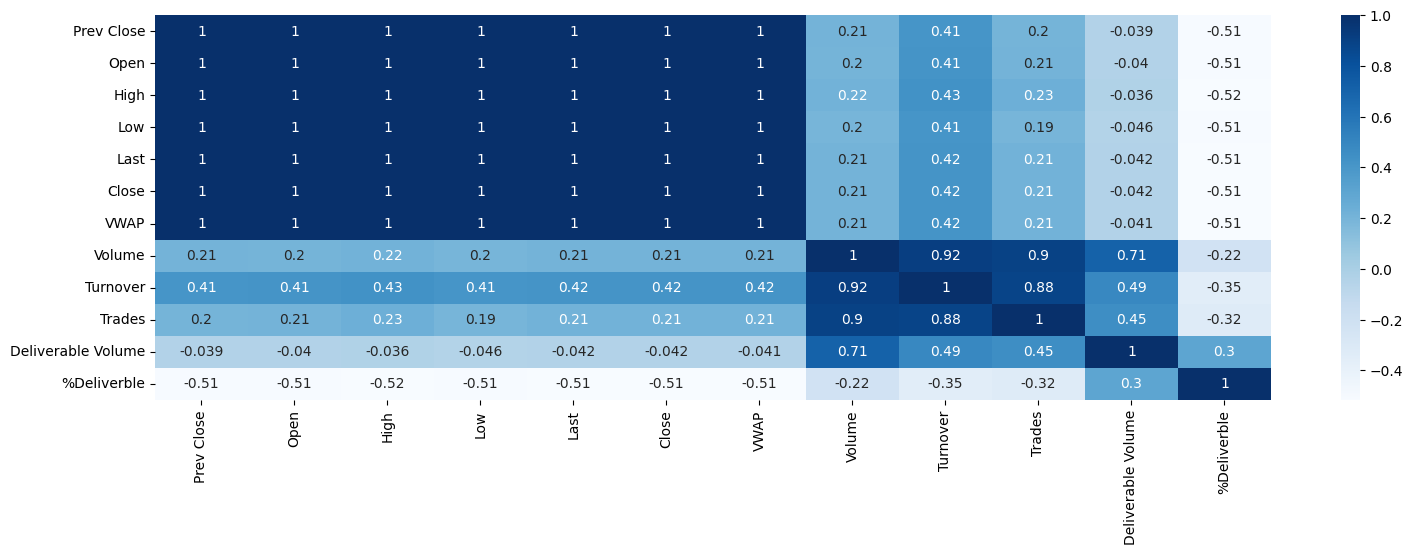

In [27]:
plt.figure(figsize=(18,5))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

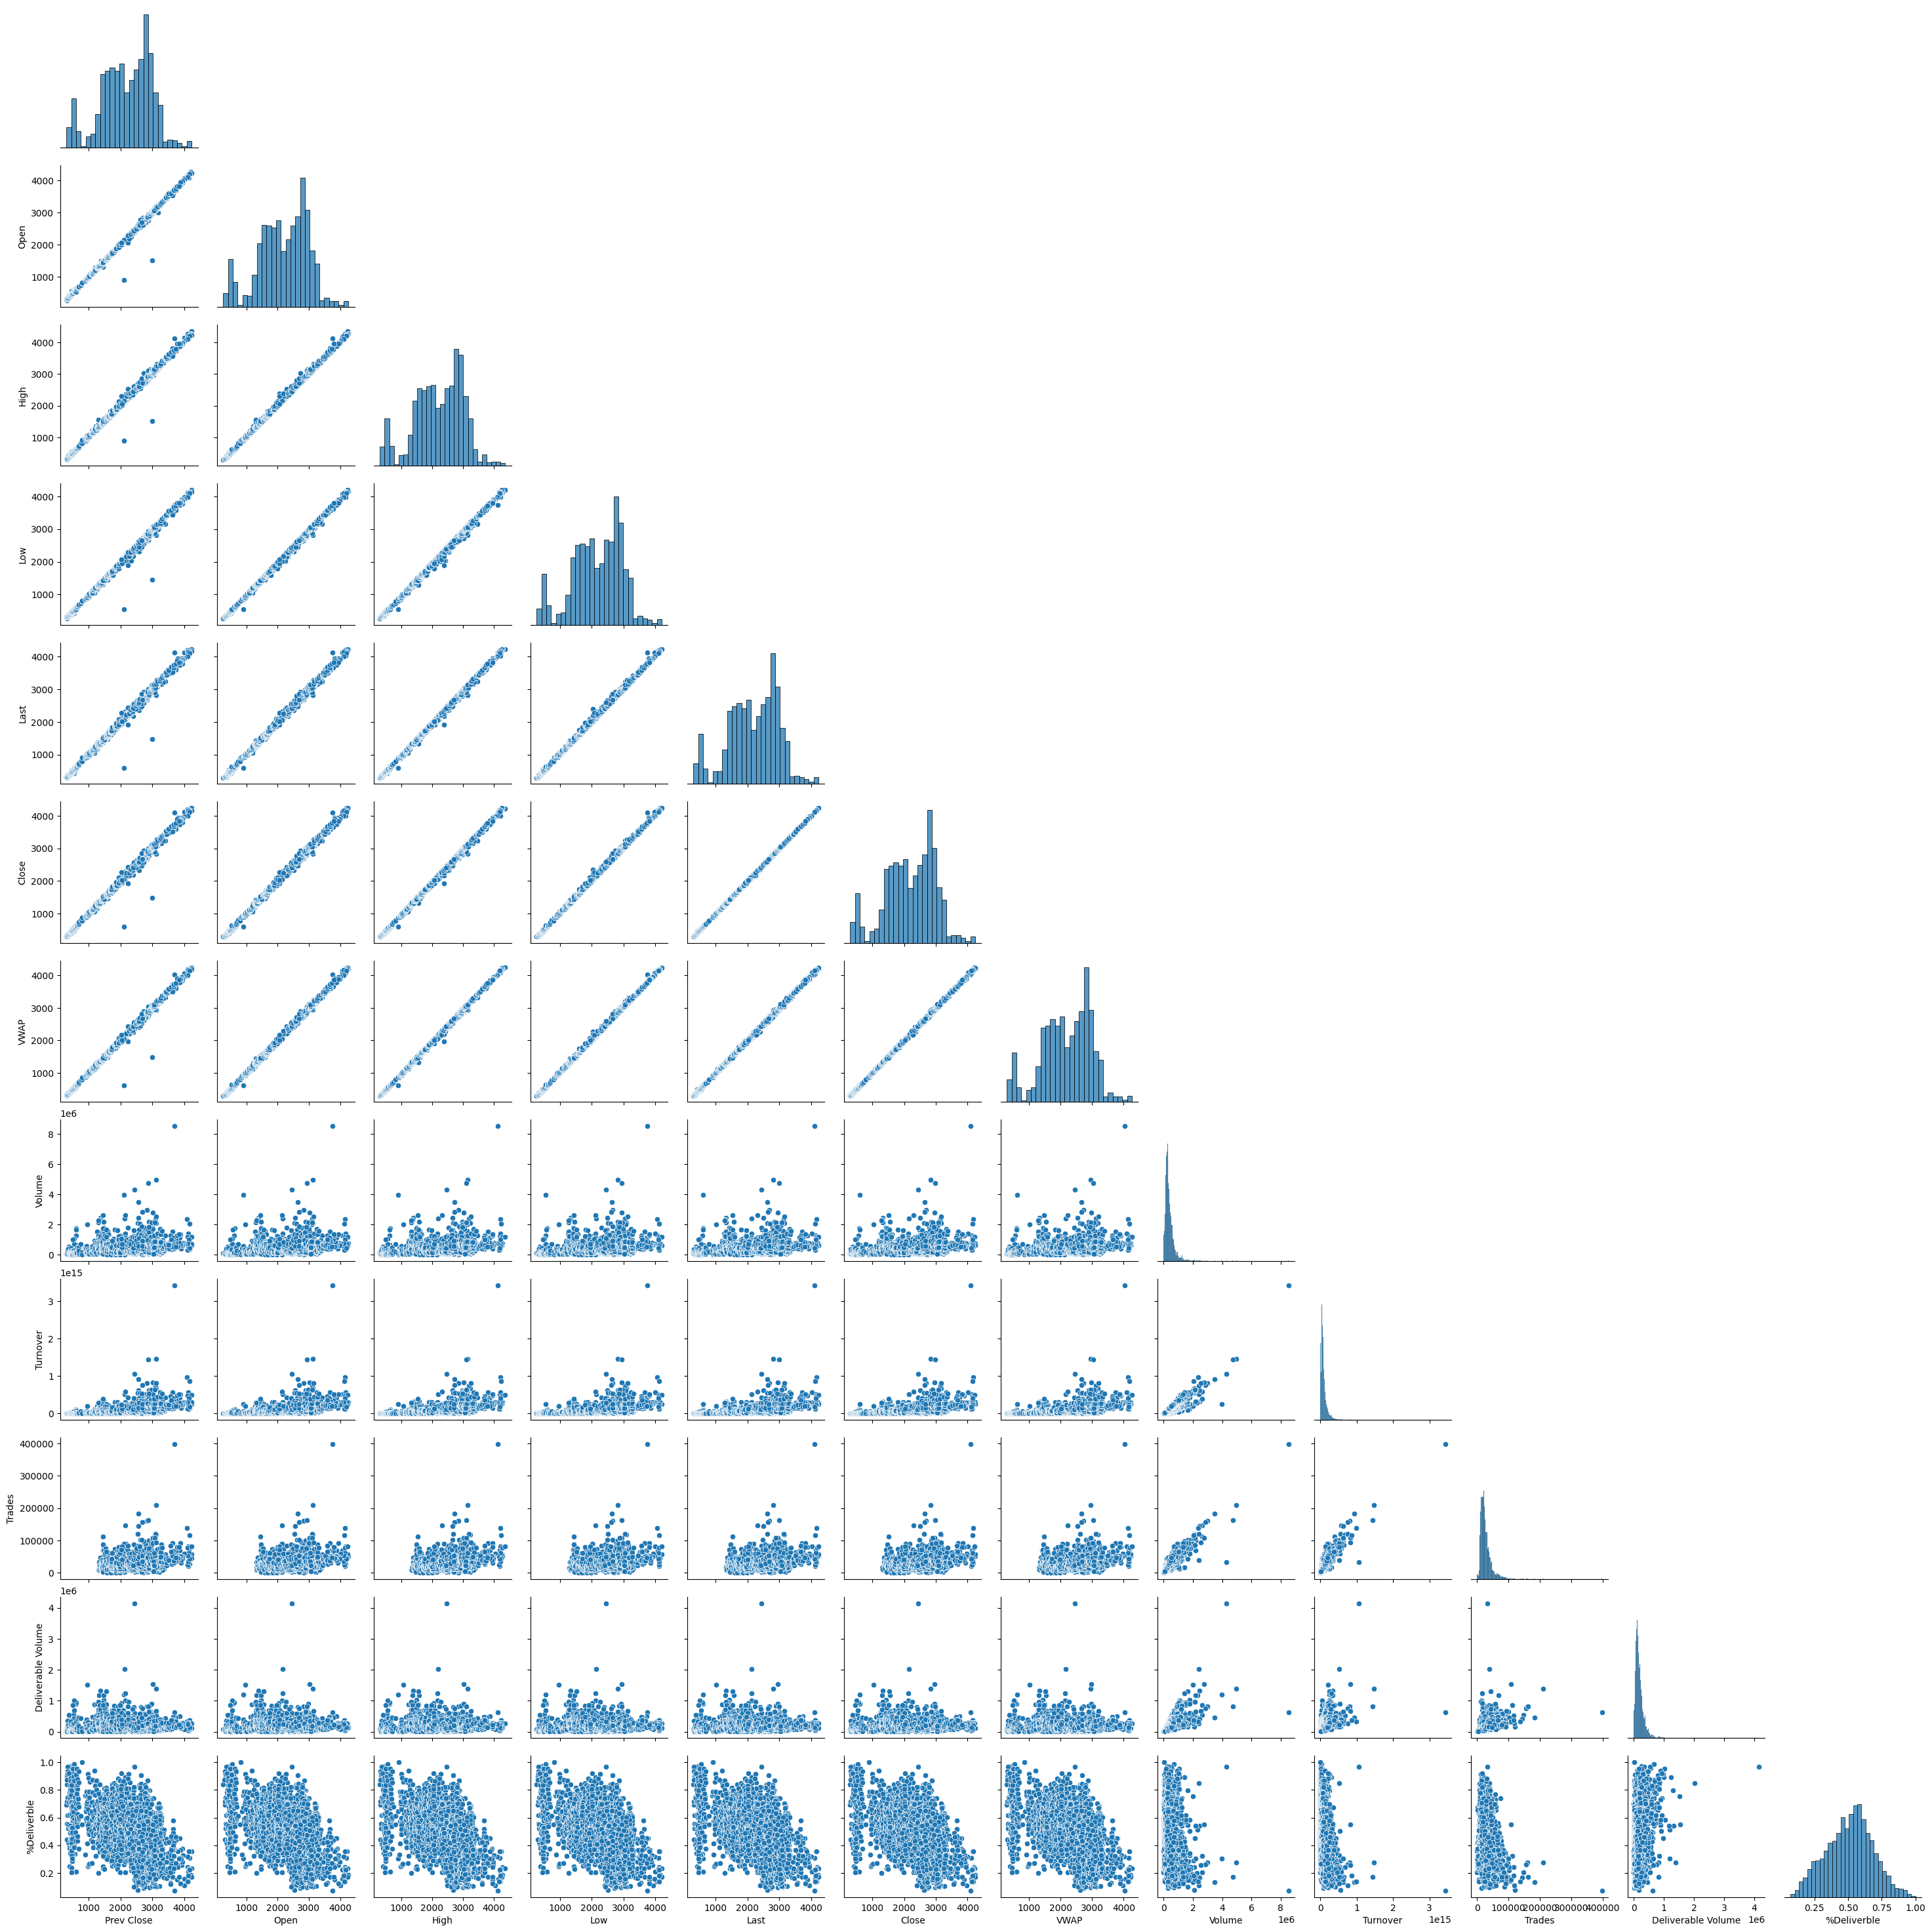

In [23]:
sns.pairplot(data,corner=True)
plt.show()

In [79]:
mean = data['Trades'].mean
mean()

27487.876628664497

In [80]:
fig = px.line(data, x="Prev Close", y="Symbol", color='Volume',markers=True,color_discrete_sequence=['white','orange'],template='plotly_dark')
fig.show()

In [45]:
df= data.copy()
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3202 non-null   object 
 1   Symbol              3202 non-null   object 
 2   Series              3202 non-null   object 
 3   Prev Close          3202 non-null   float64
 4   Open                3202 non-null   float64
 5   High                3202 non-null   float64
 6   Low                 3202 non-null   float64
 7   Last                3202 non-null   float64
 8   Close               3202 non-null   float64
 9   VWAP                3202 non-null   float64
 10  Volume              3202 non-null   int64  
 11  Turnover            3202 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3202 non-null   int64  
 14  %Deliverble         3202 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.4

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Open']=le.fit_transform(df['Open'])
df['Volume']=le.fit_transform(df['Volume'])
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,212,898.00,551.35,600.25,604.75,624.61,3191,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,188,639.00,580.30,595.50,593.15,606.43,3153,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,143,621.90,561.65,605.10,608.15,608.75,3147,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,183,619.40,576.00,600.00,599.45,600.98,2765,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,170,607.00,538.00,576.25,571.70,565.55,3101,7.137937e+13,NaN,936432,0.7420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2021-04-26,BAJAJ-AUTO,EQ,3672.50,2379,3749.00,3676.00,3739.00,3738.85,3719.79,2337,1.785560e+14,36835.0,155563,0.3241
3198,2021-04-27,BAJAJ-AUTO,EQ,3738.85,2383,3798.00,3727.20,3795.00,3785.50,3764.89,2464,1.952048e+14,47765.0,140987,0.2719
3199,2021-04-28,BAJAJ-AUTO,EQ,3785.50,2389,3954.00,3807.00,3887.15,3889.75,3909.99,3097,4.899048e+14,78857.0,190766,0.1523
3200,2021-04-29,BAJAJ-AUTO,EQ,3889.75,2399,3954.30,3807.10,3818.95,3836.45,3880.32,3115,5.181950e+14,92106.0,168500,0.1262


In [51]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [67]:
fig=px.bar(data.head(100),x='Open',y='Series',template='ggplot2')
fig.show()

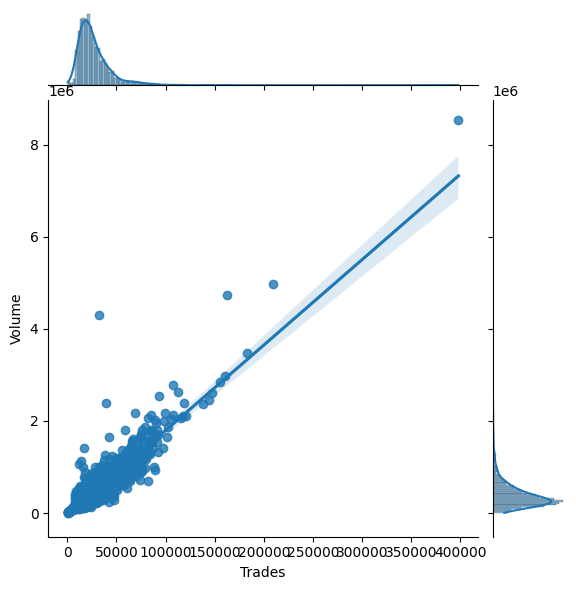

In [71]:
sns.jointplot(data=data,x='Trades',y='Volume',kind='reg')
plt.show()

In [73]:
train = pd.read_csv("/content/drive/MyDrive/BAJAJ-AUTO.csv")
test = pd.read_csv("/content/drive/MyDrive/BAJAJ-AUTO.csv")

In [74]:
train.isnull().sum()
print("Train Shape:",train.shape)
test.isnull().sum()
print("Test Shape:",test.shape)


Train Shape: (3202, 15)
Test Shape: (3202, 15)


In [77]:
train.Trades.value_counts()

26151.0    3
26756.0    2
13759.0    2
29691.0    2
10262.0    2
          ..
13048.0    1
17148.0    1
12376.0    1
9933.0     1
79430.0    1
Name: Trades, Length: 2397, dtype: int64

In [78]:
test.Trades.value_counts()

26151.0    3
26756.0    2
13759.0    2
29691.0    2
10262.0    2
          ..
13048.0    1
17148.0    1
12376.0    1
9933.0     1
79430.0    1
Name: Trades, Length: 2397, dtype: int64